# Test posos - Aout 2019

# 1- Chargement des données

In [34]:
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint


# Data preparation

In [37]:
def input_dataset(filename):
    df_input = pd.read_csv(filename, encoding = "latin1")
    print(df_input.head())
    ID = df_input["ID"]
    #Question = df_input["question"]
    Question = list (df_input["question"])
    return (ID, Question, df_input)

In [38]:
ID, Question, df_input = input_dataset("input_train.csv")

   ID                                           question
0   0  bonjour,  je m suis trompÃ© de forum pour ma q...
1   1  est ce que le motilium me soulagera contre les...
2   2  mon mÃ©decin m'a prescrit adenyl. au 2Ã¨me cac...
3   3  Est-ce qu'il existe une forme adaptÃ©e aux enf...
4   4  mon  medecin  me soigne  pour  une  rhino  pha...


In [91]:
df_input.describe()

,ID
count,8028.000000
mean,4013.500000
std,2317.628314
min,0.000000
25%,2006.750000
50%,4013.500000
75%,6020.250000
max,8027.000000


In [40]:
def output_dataset(filename):
    df_output = pd.read_csv(filename, encoding = "utf8")
    print(df_output.head())
    ID = df_output["ID"]
    intention = df_output["intention"]
    unique_intent = list(set(intention))
    return (ID, unique_intent, df_output)

In [41]:
ID, unique_intent, df_output = output_dataset("output_train.csv")

   ID  intention
0   0         28
1   1         31
2   2         28
3   3         44
4   4         31


In [42]:
df_output.head

<bound method NDFrame.head of         ID  intention
0        0         28
1        1         31
2        2         28
3        3         44
4        4         31
...    ...        ...
8023  8023         41
8024  8024         48
8025  8025         42
8026  8026         14
8027  8027         22

[8028 rows x 2 columns]>

In [43]:
print(Question[:5])


["bonjour,  je m suis trompÃ© de forum pour ma question alors je la repose ici. je pris pour la premiÃ¨re fois hier du paroxÃ©tine et ce matin c'est une catastrophe. picotement dasn tous le corps annonciateur de sueur froide trÃ¨s trÃ¨s massive et de vomissement. j'en suis Ã\xa0 deux crises depuis 5 heure du mat. la cela semble passer mes mes mains reste moites et chaude estce normal pour la premiÃ¨re fois merci a tous", 'est ce que le motilium me soulagera contre les nausÃ©es?', "mon mÃ©decin m'a prescrit adenyl. au 2Ã¨me cachet des maux de tÃªte terribles et au 3Ã¨me palpitations, sueurs froides, chaleur intense dans la tÃªte, tremblements, fourmillements dans la lÃ¨vre supÃ©rieure, difficultÃ©s Ã\xa0 respirer.. dÃ¨s l'arrÃªt du mÃ©dicament tous les symptÃ´mes ont disparu. cela est-il dÃ©jÃ\xa0 arrivÃ© Ã\xa0 quelqu'un??", "Est-ce qu'il existe une forme adaptÃ©e aux enfant de 5ans du Micropakine ?", "mon  medecin  me soigne  pour  une  rhino  pharingite  et  m'a  prescrit du amoxicill

In [44]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vsaliba-/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
nltk.download("punkt")


[nltk_data] Downloading package punkt to /Users/vsaliba-/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
print(unique_intent)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [47]:
print(df_output.describe())
print(df_input.describe())


                ID    intention
count  8028.000000  8028.000000
mean   4013.500000    28.248754
std    2317.628314    12.001745
min       0.000000     0.000000
25%    2006.750000    22.000000
50%    4013.500000    28.000000
75%    6020.250000    34.000000
max    8027.000000    50.000000
                ID
count  8028.000000
mean   4013.500000
std    2317.628314
min       0.000000
25%    2006.750000
50%    4013.500000
75%    6020.250000
max    8027.000000


# 2- Data cleaning

In [48]:
#define stemmer
stemmer = LancasterStemmer()

In [49]:
def cleaning(Question):
    words = []
    for q in Question:
        clean = re.sub(r'[^ a-z A-Z 0-9]', " ", q)
        #clean = re.sub(r'[éè]', "e", q)
        w = word_tokenize(clean)
        #stemming
        words.append([i.lower() for i in w])
        #words.append([stemmer.stem(i.lower()) for i in w])
    return words


In [50]:
cleaned_words = cleaning(Question)
print(len(cleaned_words))
print(cleaned_words[:3])

8028
[['bonjour', 'je', 'm', 'suis', 'tromp', 'de', 'forum', 'pour', 'ma', 'question', 'alors', 'je', 'la', 'repose', 'ici', 'je', 'pris', 'pour', 'la', 'premi', 're', 'fois', 'hier', 'du', 'parox', 'tine', 'et', 'ce', 'matin', 'c', 'est', 'une', 'catastrophe', 'picotement', 'dasn', 'tous', 'le', 'corps', 'annonciateur', 'de', 'sueur', 'froide', 'tr', 's', 'tr', 's', 'massive', 'et', 'de', 'vomissement', 'j', 'en', 'suis', 'deux', 'crises', 'depuis', '5', 'heure', 'du', 'mat', 'la', 'cela', 'semble', 'passer', 'mes', 'mes', 'mains', 'reste', 'moites', 'et', 'chaude', 'estce', 'normal', 'pour', 'la', 'premi', 're', 'fois', 'merci', 'a', 'tous'], ['est', 'ce', 'que', 'le', 'motilium', 'me', 'soulagera', 'contre', 'les', 'naus', 'es'], ['mon', 'm', 'decin', 'm', 'a', 'prescrit', 'adenyl', 'au', '2', 'me', 'cachet', 'des', 'maux', 'de', 't', 'te', 'terribles', 'et', 'au', '3', 'me', 'palpitations', 'sueurs', 'froides', 'chaleur', 'intense', 'dans', 'la', 't', 'te', 'tremblements', 'fourmil

# 3- Encoding : to convert words into indexes

In [51]:
#creating tokenizer : utiliser la classe Tokenizer de Keras
def create_tokenizer(words, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'):
    token = Tokenizer(filters = filters)
    token.fit_on_texts(words)
    return token

In [52]:
#getting maximum lemgth
def max_length(words):
  return(len(max(words, key = len)))


In [53]:
word_tokenizer = create_tokenizer(cleaned_words)
vocab_size = len(word_tokenizer.word_index) + 1
max_length = max_length(cleaned_words)

print("Vocab Size = %d and Maximum length = %d" % (vocab_size, max_length))

Vocab Size = 9346 and Maximum length = 778


In [54]:
#encoding list of words
def encoding_doc(token, words):
  return(token.texts_to_sequences(words))

In [55]:
encoded_doc = encoding_doc(word_tokenizer, cleaned_words)

In [56]:
#padding to make them equal length
def padding_doc(encoded_doc, max_length):
  return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [57]:
padded_doc = padding_doc(encoded_doc, max_length)

In [58]:
padded_doc[0:1]

array([[ 122,    2,   18,   34, 1441,    1,  980,   21,   32,  175,  154,
           2,    5, 3387,  927,    2,   69,   21,    5,  244,   97,  125,
         148,   16,  876,  642,    4,   12,  123,   38,    3,   22, 3388,
        3389, 4923,  218,    7,  418, 4924,    1, 4925, 2673,  138,   23,
         138,   23, 2674,    4,    1, 1251,    6,   20,   34,  116,  469,
          30,  117,  339,   16, 3390,    5,  109,  735,  269,   47,   47,
        1169,  595, 4926,    4, 2239, 3391,   82,   21,    5,  244,   97,
         125,  120,   10,  218,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [59]:
cleaned_words[:2]

[['bonjour',
  'je',
  'm',
  'suis',
  'tromp',
  'de',
  'forum',
  'pour',
  'ma',
  'question',
  'alors',
  'je',
  'la',
  'repose',
  'ici',
  'je',
  'pris',
  'pour',
  'la',
  'premi',
  're',
  'fois',
  'hier',
  'du',
  'parox',
  'tine',
  'et',
  'ce',
  'matin',
  'c',
  'est',
  'une',
  'catastrophe',
  'picotement',
  'dasn',
  'tous',
  'le',
  'corps',
  'annonciateur',
  'de',
  'sueur',
  'froide',
  'tr',
  's',
  'tr',
  's',
  'massive',
  'et',
  'de',
  'vomissement',
  'j',
  'en',
  'suis',
  'deux',
  'crises',
  'depuis',
  '5',
  'heure',
  'du',
  'mat',
  'la',
  'cela',
  'semble',
  'passer',
  'mes',
  'mes',
  'mains',
  'reste',
  'moites',
  'et',
  'chaude',
  'estce',
  'normal',
  'pour',
  'la',
  'premi',
  're',
  'fois',
  'merci',
  'a',
  'tous'],
 ['est',
  'ce',
  'que',
  'le',
  'motilium',
  'me',
  'soulagera',
  'contre',
  'les',
  'naus',
  'es']]

In [60]:
encoded_doc[:2]


[[122,
  2,
  18,
  34,
  1441,
  1,
  980,
  21,
  32,
  175,
  154,
  2,
  5,
  3387,
  927,
  2,
  69,
  21,
  5,
  244,
  97,
  125,
  148,
  16,
  876,
  642,
  4,
  12,
  123,
  38,
  3,
  22,
  3388,
  3389,
  4923,
  218,
  7,
  418,
  4924,
  1,
  4925,
  2673,
  138,
  23,
  138,
  23,
  2674,
  4,
  1,
  1251,
  6,
  20,
  34,
  116,
  469,
  30,
  117,
  339,
  16,
  3390,
  5,
  109,
  735,
  269,
  47,
  47,
  1169,
  595,
  4926,
  4,
  2239,
  3391,
  82,
  21,
  5,
  244,
  97,
  125,
  120,
  10,
  218],
 [3, 12, 8, 7, 1340, 24, 4927, 83, 19, 236, 96]]

In [111]:
encoded_doc.shape

(8028,)

In [61]:
print("Shape of padded docs = ",padded_doc.shape)

Shape of padded docs =  (8028, 778)


In [127]:
tab = []
for line in encoded_doc:
    tab.append(line. __len__())
tab

[81,
 11,
 63,
 15,
 23,
 16,
 9,
 12,
 5,
 69,
 6,
 28,
 38,
 10,
 3,
 12,
 42,
 26,
 21,
 3,
 11,
 11,
 11,
 8,
 25,
 8,
 19,
 4,
 8,
 182,
 37,
 7,
 53,
 7,
 20,
 6,
 10,
 8,
 71,
 3,
 8,
 48,
 2,
 9,
 24,
 20,
 14,
 8,
 5,
 1,
 10,
 13,
 111,
 6,
 5,
 19,
 19,
 4,
 41,
 8,
 25,
 8,
 13,
 31,
 5,
 6,
 15,
 94,
 6,
 75,
 6,
 5,
 13,
 20,
 44,
 10,
 17,
 10,
 10,
 4,
 6,
 16,
 21,
 5,
 10,
 5,
 13,
 8,
 8,
 13,
 131,
 15,
 6,
 8,
 7,
 36,
 32,
 26,
 8,
 13,
 10,
 6,
 7,
 6,
 7,
 4,
 10,
 51,
 5,
 4,
 4,
 96,
 3,
 39,
 56,
 10,
 13,
 21,
 18,
 5,
 5,
 15,
 6,
 8,
 2,
 32,
 19,
 3,
 1,
 3,
 67,
 6,
 4,
 5,
 6,
 5,
 4,
 8,
 4,
 17,
 51,
 10,
 14,
 5,
 4,
 21,
 6,
 6,
 3,
 9,
 11,
 5,
 39,
 8,
 8,
 71,
 14,
 15,
 11,
 7,
 13,
 6,
 8,
 8,
 10,
 4,
 7,
 45,
 3,
 9,
 7,
 7,
 90,
 24,
 6,
 12,
 4,
 9,
 5,
 3,
 32,
 8,
 9,
 13,
 13,
 29,
 8,
 26,
 11,
 3,
 22,
 12,
 3,
 18,
 6,
 11,
 3,
 11,
 7,
 5,
 8,
 4,
 2,
 17,
 12,
 43,
 10,
 15,
 38,
 4,
 6,
 18,
 67,
 10,
 16,
 28,
 77,
 4,
 15,
 6,
 7

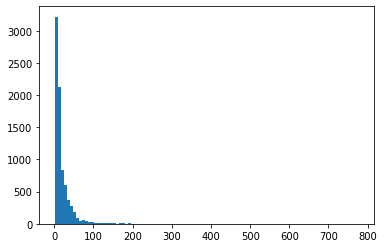

In [149]:
import matplotlib.pyplot as plt
plt.hist(tab, bins=100)
plt.show()


In [122]:
unique_long_lig = list(set(tab))
unique_long_lig


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 113,
 114,
 118,
 119,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 152,
 157,
 165,
 166,
 167,
 168,
 174,
 175,
 178,
 179,
 180,
 182,
 185,
 189,
 190,
 191,
 194,
 195,
 196,
 200,
 203,
 205,
 206,
 212,
 214,
 215,
 218,
 224,
 235,
 239,
 247,
 248,
 258,
 264,
 778,
 268,
 272,
 279,
 296,
 366,
 408,
 419,
 447]

In [124]:
tab1 = [:,1:8028]


SyntaxError: invalid syntax (<ipython-input-124-e02fbbff2dd3>, line 1)

In [62]:
df_output.shape
df_output


,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31
5,5,44
6,6,48
7,7,28
8,8,22
9,9,23


In [68]:
df_output = array(df_output['intention'])

In [69]:
df_output

array([28, 31, 28, ..., 42, 14, 22])

In [70]:
encoded_output = to_categorical (df_output)

In [86]:
encoded_output[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [97]:
#encoded_output = int(encoded_output)

TypeError: only size-1 arrays can be converted to Python scalars

In [77]:
inverted = argmax(encoded_output[1])

In [78]:
inverted


31

In [80]:
encoded_output.shape

(8028, 51)

In [94]:
print(padded_doc)
print(encoded_output)

[[ 122    2   18 ...    0    0    0]
 [   3   12    8 ...    0    0    0]
 [  35   18  141 ...    0    0    0]
 ...
 [  13  347   18 ...    0    0    0]
 [  72  101   16 ...    0    0    0]
 [1063   18  140 ...    0    0    0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [105]:
#C = np.concatenate((padded_doc),(encoded_output))

# 4- Train and validation set

In [ ]:
#split the data
from sklearn.model_selection import train_test_split